## Implementation of PCA

### Goal of PCA
PCA findas a new set of dimensions such that all the dimenstions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them.

Find a transfromation such that
- The transformed features are linearly independent
- Dimensionality can be reduced by taking the dimensions with the highest importance
- Those newly found dimensions should minimize the projection error
- The projected points should have maximum spread i.e. maximum variance

### Variance
How much variation or spread the data has.

$$ Var(X) = \frac{1}{n} \sum(X_i - \hat{X})^2$$

### Covariance Matrix
Indicates the level to which two variables vary together.

$$Cov(X,Y) = \frac{1}{n} \sum(X_i - \hat{X})(Y_i - \hat{Y})^T$$

$$Cov(X,X) = \frac{1}{n} \sum(X_i - \hat{X})(X_i - \hat{X})^T$$

### Eignevector, Eigenvalues
The eigenvectors point in the direction of the maximum variance, and the corresponding eigenvalues indicates the importance of its corresponding eigenvectors.

$A\vec{v} = \lambda \vec{v}$

In [4]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self, X):
        # mean
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance
        cov = np.cov(X.T)  # why transpose? rows must contain features
        # eigenvectors, eigenvalue
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # first first n eigenvectors
        self.components = eigenvectors[0:self.n_components]
        
    def transform(self, X):
        X = X-self.mean
        return np.dot(X, self.components.T)
    


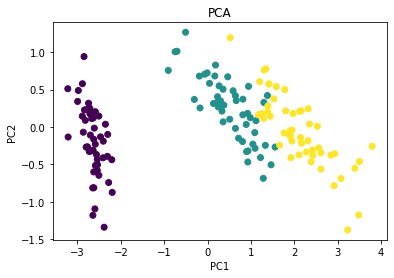

In [11]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Load Dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Projecting data to 2 PC
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

# Plotting
fig, ax = plt.subplots()
_ = ax.scatter(X_projected[:,0], X_projected[:, 1],
               c=y)
_ = ax.set(title='PCA', xlabel='PC1', ylabel='PC2')